#Business Problem :#
- The business problem revolves around enhancing the wine quality testing process. Typically, wine quality assessment rely on human somaliers who have studies the characteristics and histories of wines from different regions. This can be subjective and inconsistent as humans can have biases to certain regions, styles of wine, producers, and more. By developing a predictive model using machine learning, we aim to supplement or replace subjective assessments with more consistent, objective evaluations.  Our model uses only chemical properties of the wine for evaluation in order to avoid bias due to the factors mentions above.

### Business Justification:##
The existing dataset is critical in understanding how different chemical properties influence wine quality, thus helping businesses streamline their quality assurance processes and product development strategies. Producers can now identify properties that lead to quality wine and selectivly breed grape varieties that express these qualities.  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Exploritory Data Analysis##

#### White Wine EDA####

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = '/content/drive/MyDrive/Johns Hopkins BARM/deep learnign with unstructured data/winequality-white.csv'
wine_quality = pd.read_csv(file_path, delimiter=';')
print(wine_quality.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

### Data Description ###
* Fixed Acidity: Most acids involved with wine are fixed or nonvolatile (do not evaporate readily).
* Volatile Acidity: The amount of acetic acid in wine, which at too high of a level can lead to an unpleasant, vinegar taste.
* Citric Acid: Found in small quantities, citric acid can add 'freshness' and flavor to wines.
* Residual Sugar: The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
* Chlorides: The amount of salt in the wine.
* Free Sulfur Dioxide: The free form of SO₂ exists in equilibrium between molecular SO₂ (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
* Total Sulfur Dioxide: Amount of free and bound forms of S02; in low concentrations, SO₂ is mostly undetectable in wine, but at free SO₂ concentrations over 50 ppm, SO₂ becomes evident in the nose and taste of wine.
* Density: The density of wine is close to that of water depending on the percent alcohol and sugar content.
pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
* Sulphates: A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.
* Alcohol: The percent alcohol content of the wine.
Quality: Output variable (based on sensory data, score between 0 and 10).

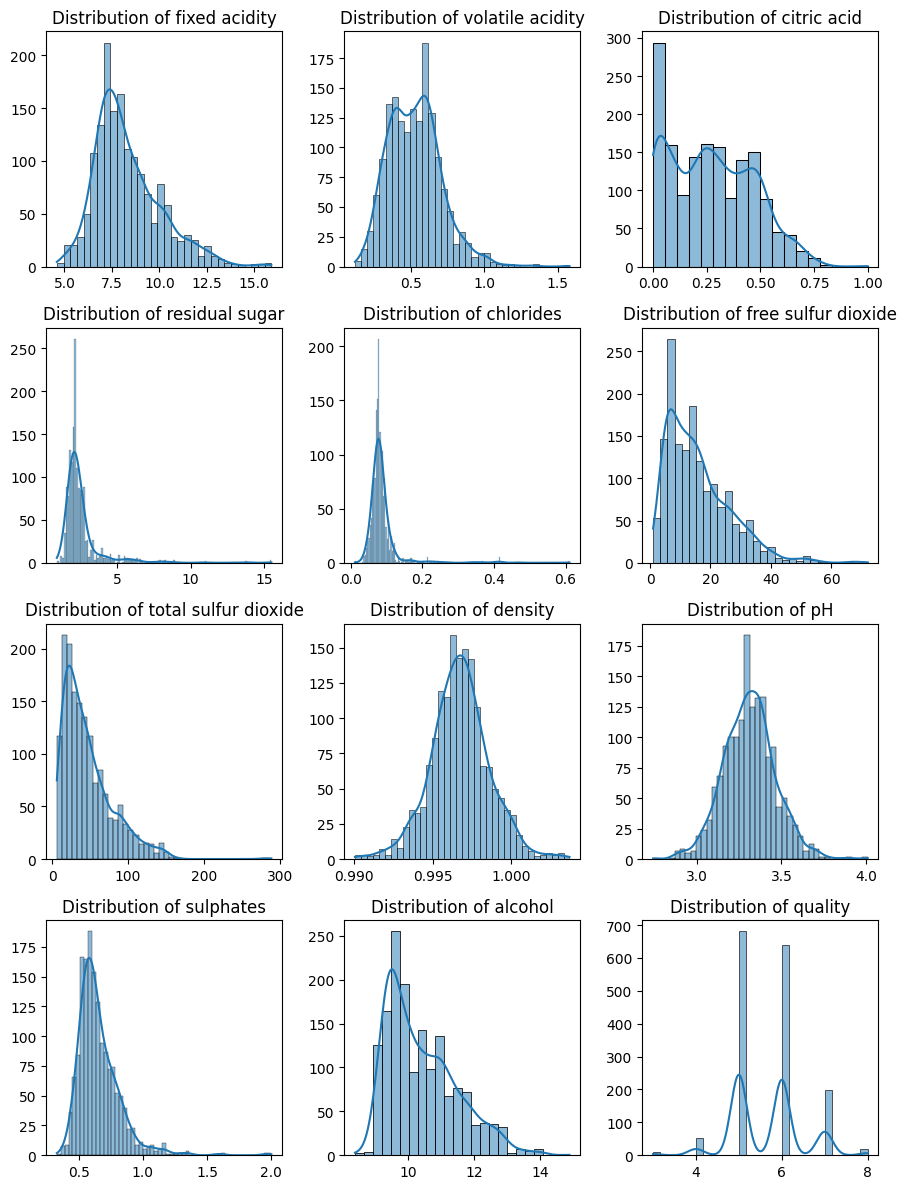

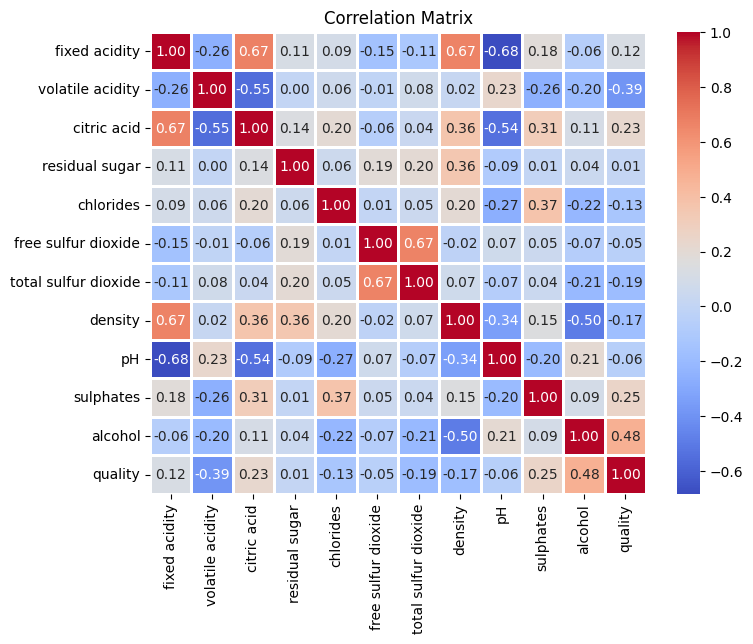

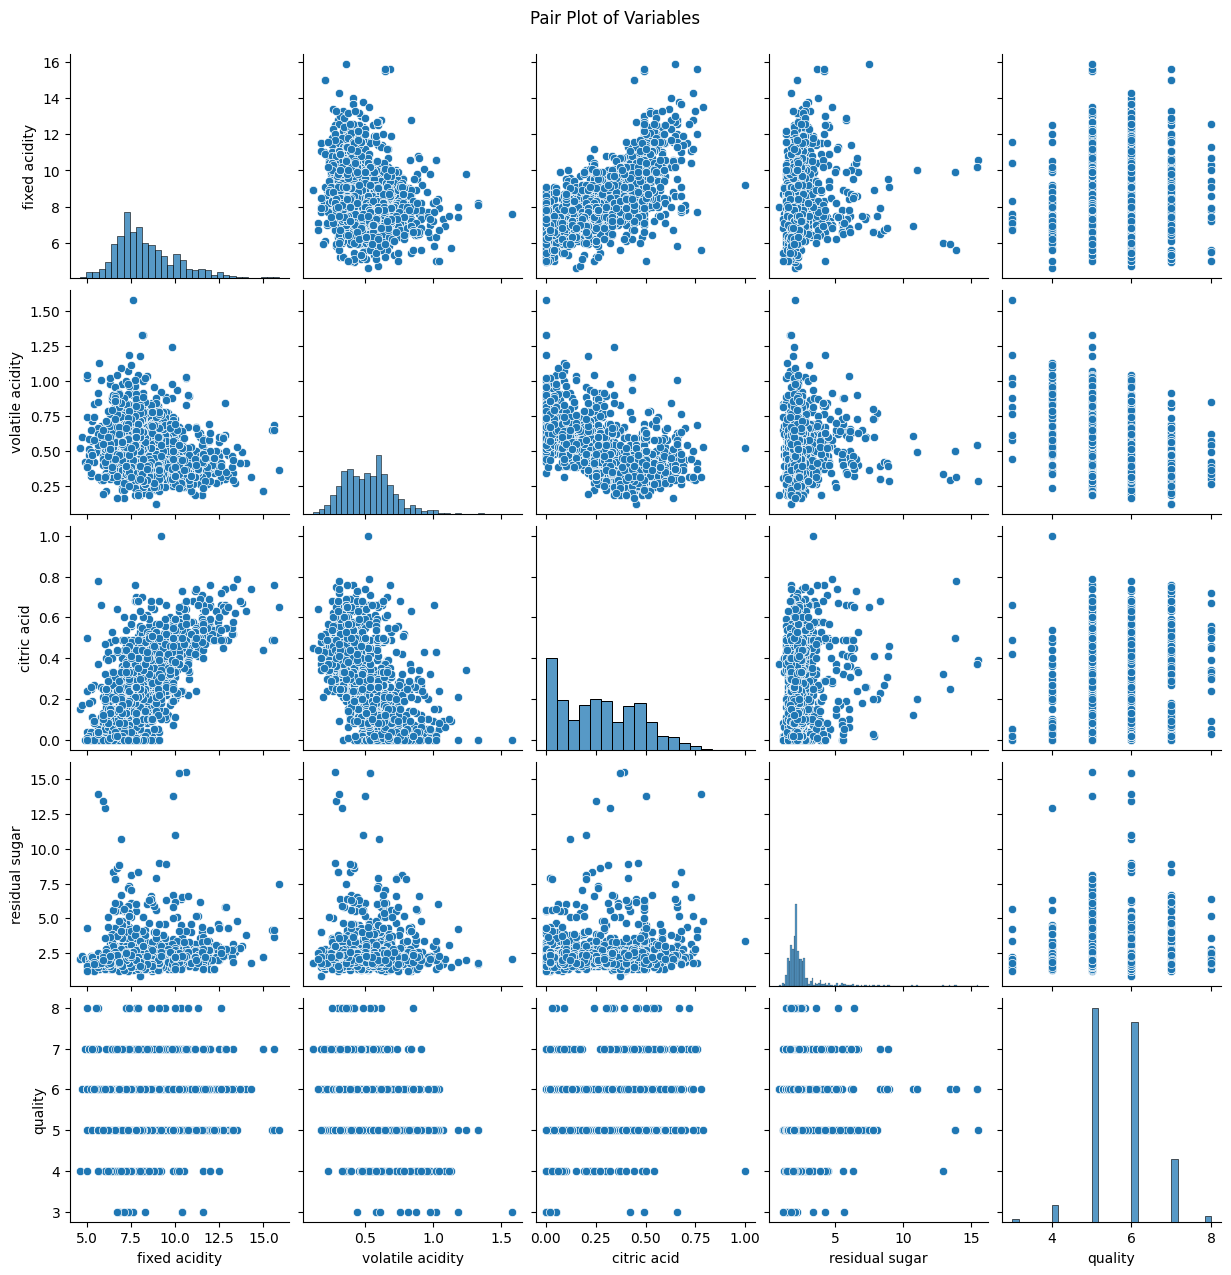

In [ ]:
# Univariate Analysis
def plot_univariate(data, rows, cols):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*3, rows*3))
    axes = axes.flatten()
    for i, col in enumerate(data.columns):
        if data[col].dtype != 'object':
            sns.histplot(data[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}', fontsize=12)
            axes[i].set_xlabel('')
            axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

# Multivariate Analysis - Correlation Matrix
def plot_correlation_matrix(data):
    plt.figure(figsize=(8, 6))
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
    plt.title('Correlation Matrix')
    plt.show()

# Multivariate Analysis - Pair Plot
def plot_pair_plot(data, vars):
    sns.pairplot(data, vars=vars)
    plt.suptitle('Pair Plot of Variables', y=1.02)  # Adjust y for title position
    plt.show()

# Running the functions
plot_univariate(wine_quality, rows=4, cols=3)  # Adjust rows and cols based on number of numerical columns
plot_correlation_matrix(wine_quality)
plot_pair_plot(wine_quality, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'quality'])  # Include more variables as needed



##Observations##
- All variables have relativly normal distributions except for "residual sugar" (right skewed), making the dataset reliable for a variety of models
- The different units of variables will need to be addressed with scaling.
- The target variable (quality) does not have many values in the lower and higher quality rating groups.  We will likely need to use some sort of oversampling method to make sure our dataset has enough values to have real predictive power for those quality levels.
    - Predictions at those levels may be less reliable, even after oversampling and additional data would be preferable.
- Higher alcohol wines lower density wines, and wines with fewer chlorides and volitile acidity may perform better in quality testing due to correlation with quality. However none of these relationships is exceptionally strong

*   List item
*   List item



#### Red Wine EDA####

In [ ]:
#Load the dataset
file_path = '/content/drive/MyDrive/Johns Hopkins BARM/deep learnign with unstructured data/winequality-red.csv'
wine_quality = pd.read_csv(file_path, delimiter=';')
print(wine_quality.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

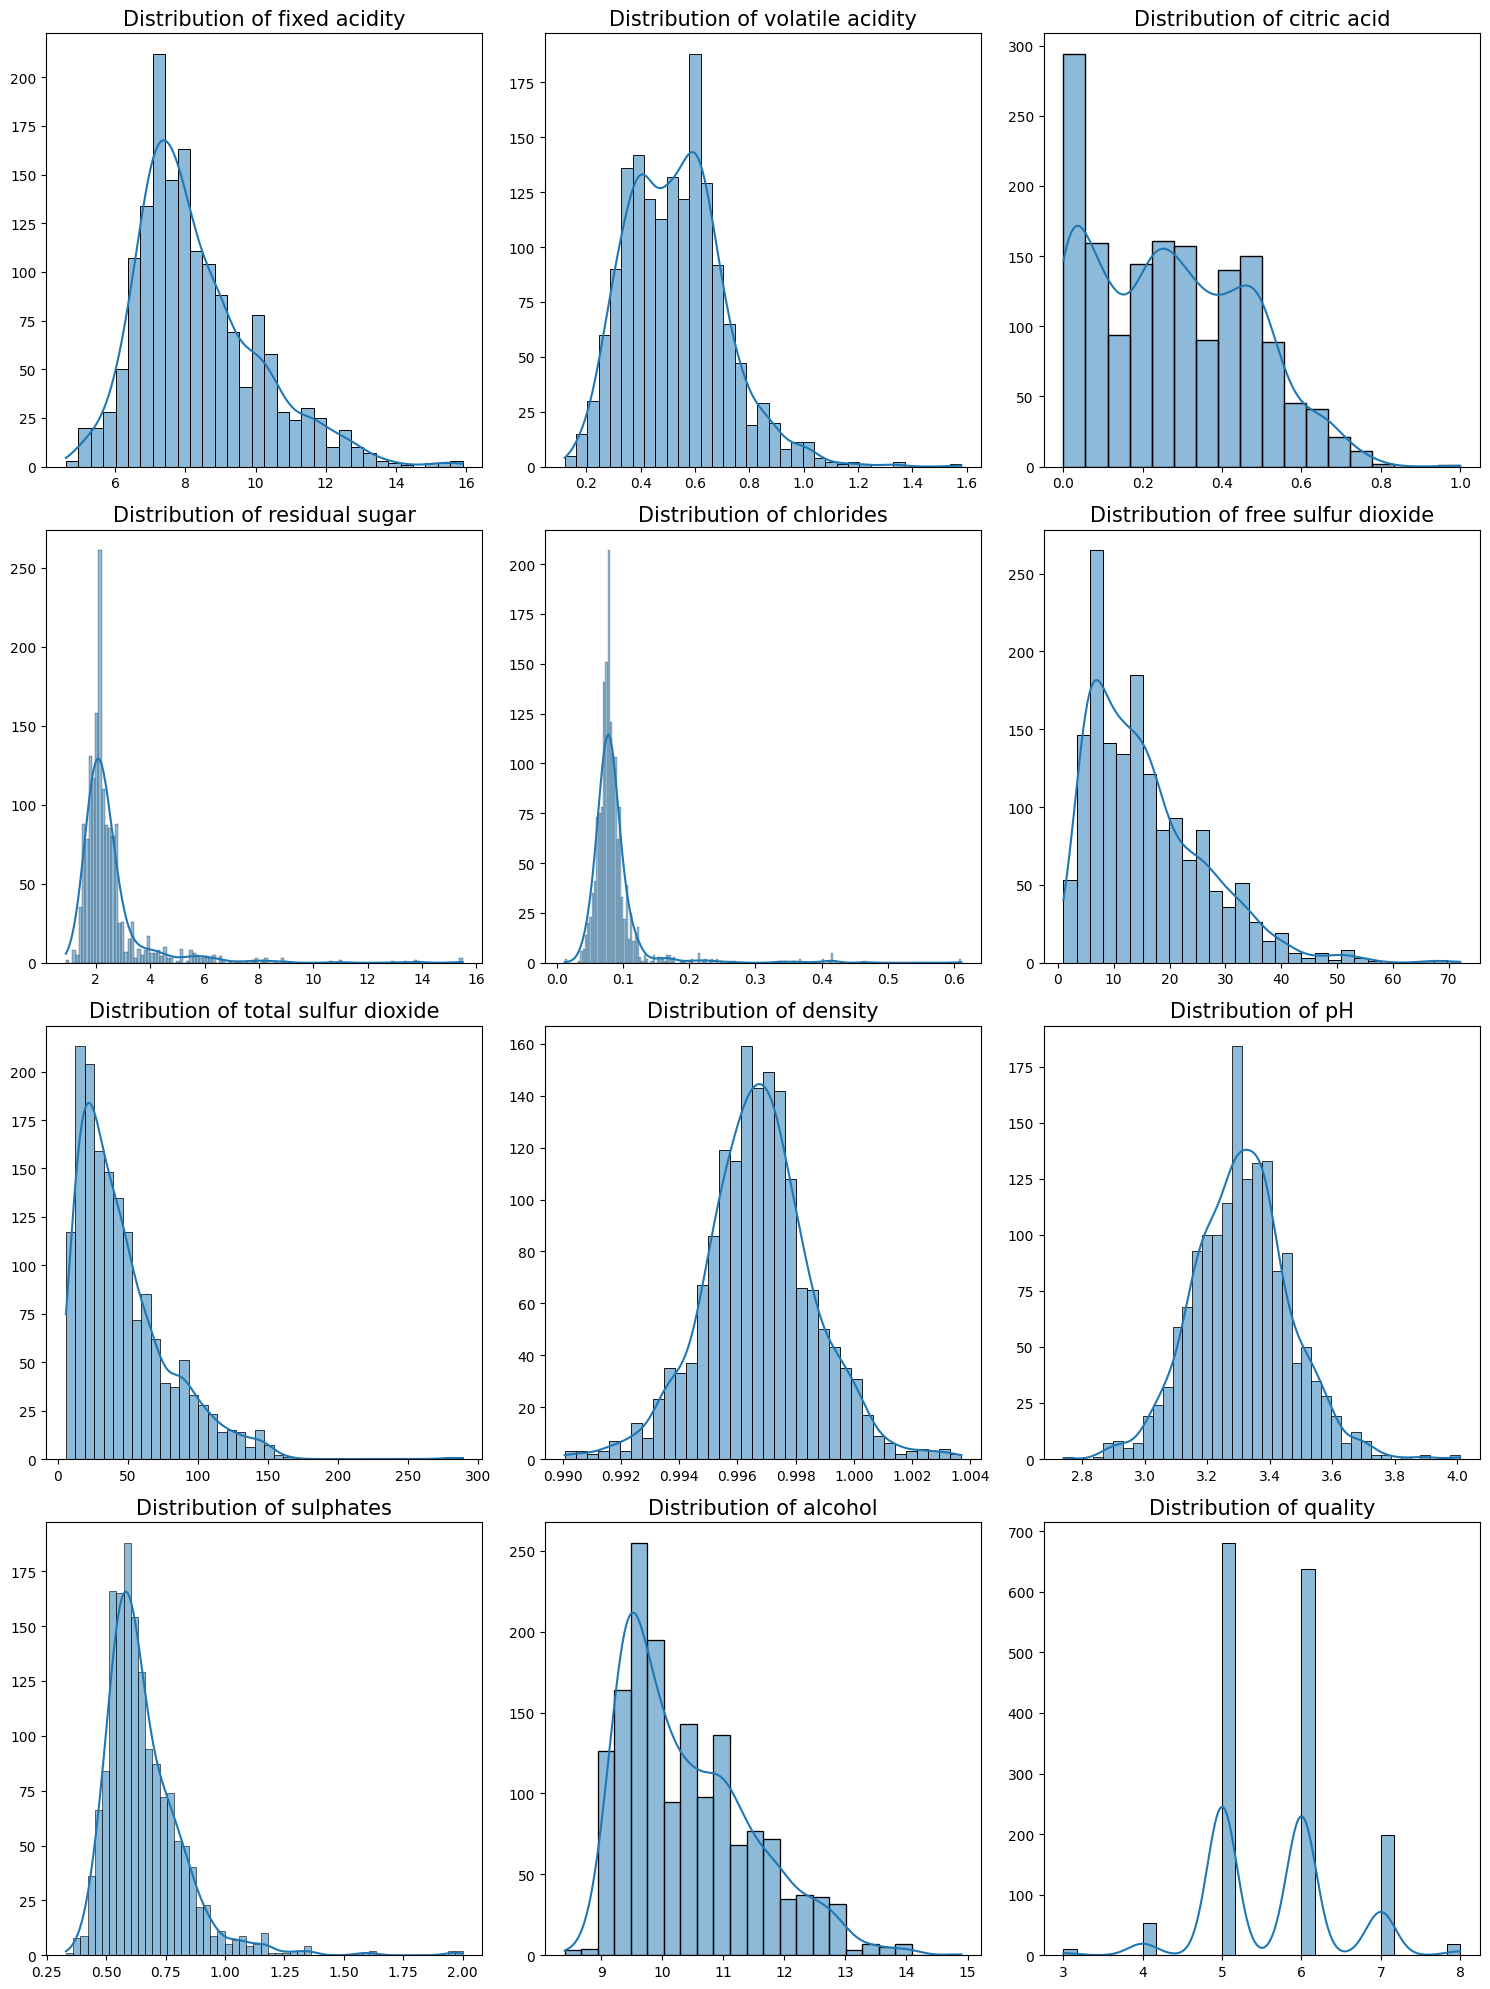

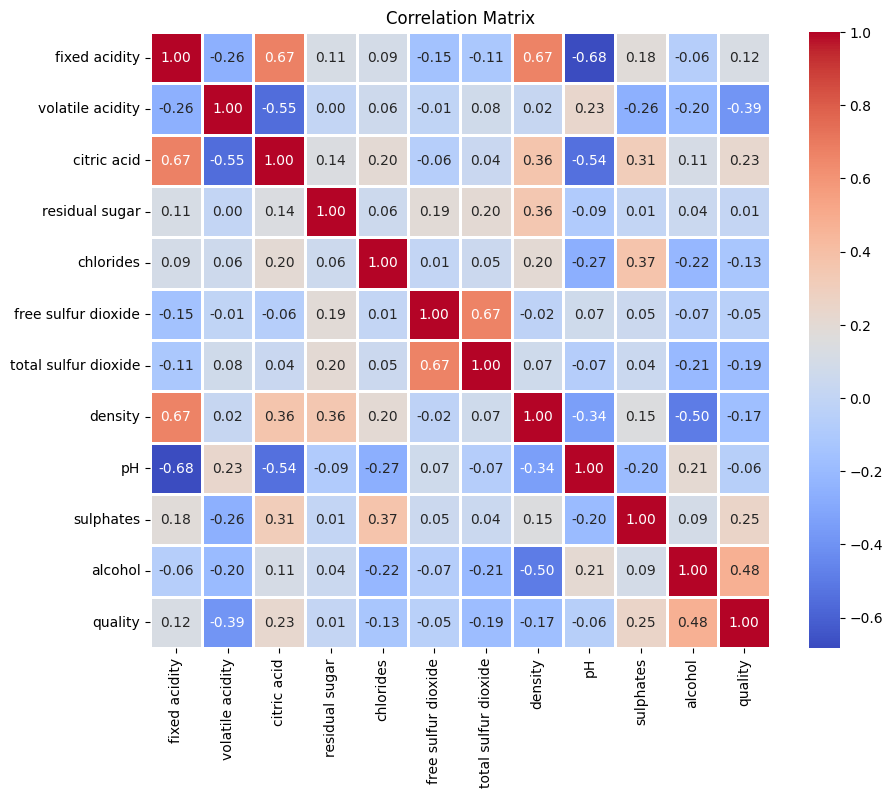

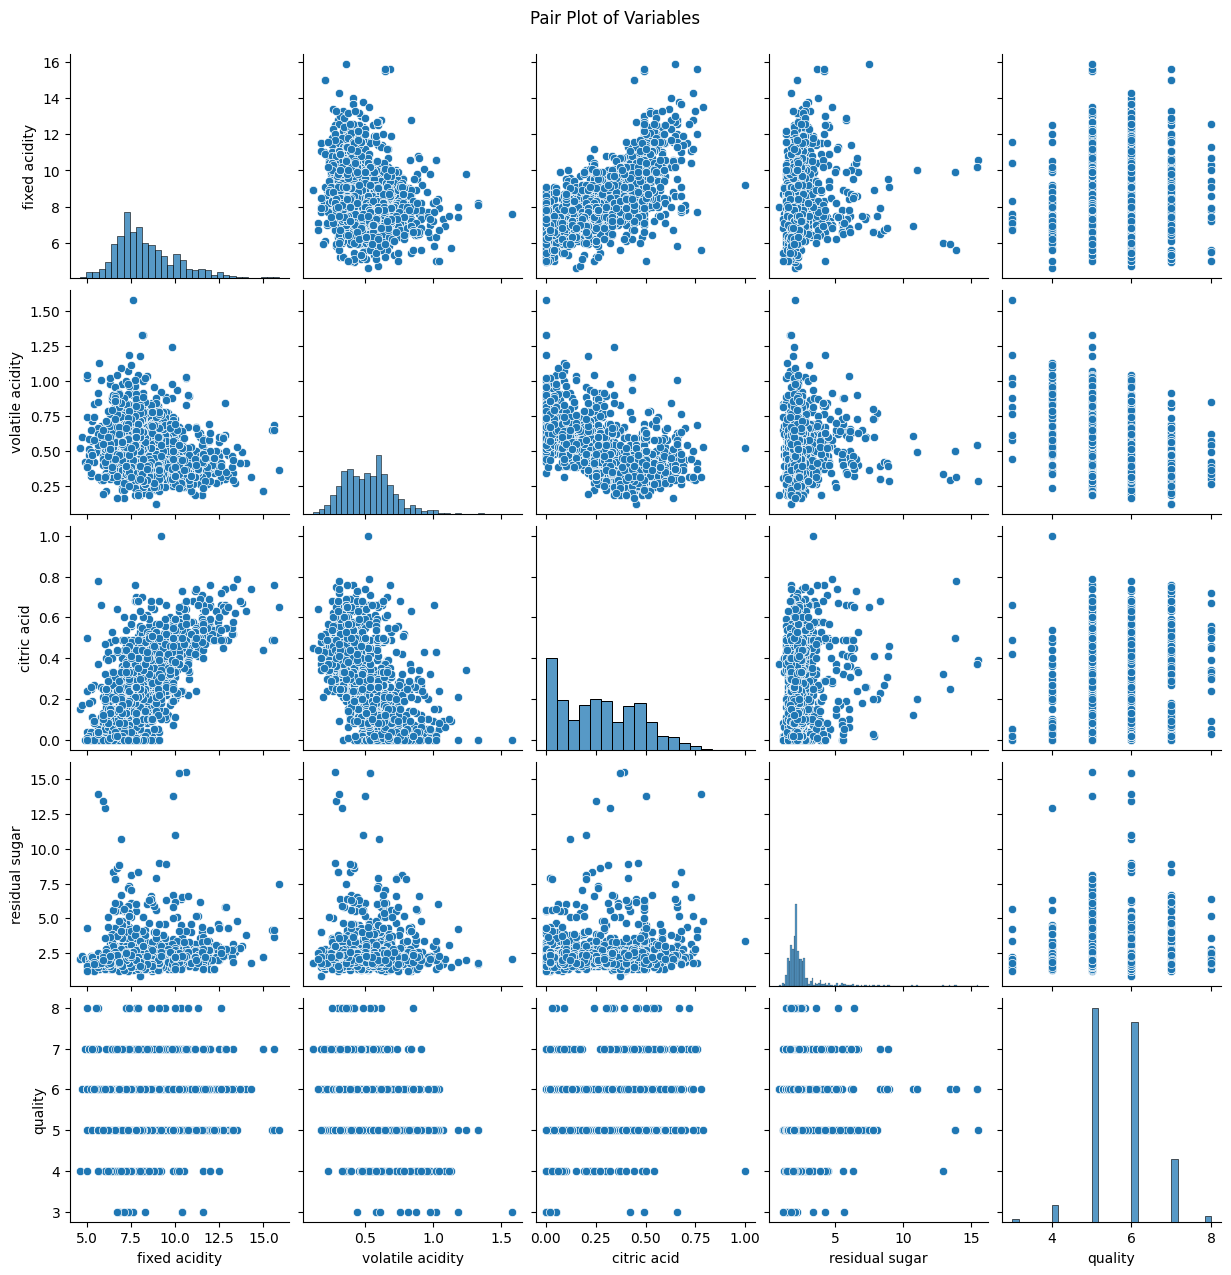

In [ ]:
# Univariate Analysis
def plot_univariate(data, rows, cols):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*5, rows*5))
    axes = axes.flatten()
    for i, col in enumerate(data.columns):
        if data[col].dtype != 'object':
            sns.histplot(data[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}', fontsize=15)
            axes[i].set_xlabel('')
            axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

# Multivariate Analysis - Correlation Matrix
def plot_correlation_matrix(data):
    plt.figure(figsize=(10, 8))
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
    plt.title('Correlation Matrix')
    plt.show()

# Multivariate Analysis - Pair Plot
def plot_pair_plot(data, vars):
    sns.pairplot(data, vars=vars)
    plt.suptitle('Pair Plot of Variables', y=1.02)  # Adjust y for title position
    plt.show()

# Running the functions
plot_univariate(wine_quality, rows=4, cols=3)  # Adjust rows and cols based on number of numerical columns
plot_correlation_matrix(wine_quality)
plot_pair_plot(wine_quality, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'quality'])  # Include more variables as needed

##Observations##
- The total dataset for red wines is smaller with only 1599 wines recorded (white wines = 4898 total records)
- Many variables have relativly normal distributions with the exception of Alcohol, sulpher dioxide, free sulpher dioxide and citric acid.  These are all right skewed
- The target variable (quality) has 0 values of quality level 9 an minimal values for
    - Predictions at those levels may be less reliable even after oversampling and additional data would be preferable.
- Volitile acidity is the only variable that seems to have a stronger (negative) relationship with quality when compared to others. That being said this correlation isn't extremely strong (-0.39)
- The different units of variables will need to be addressed with scaling.

## Initial Model: White Wine (Not Optimized)##

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load dataset from CSV file
file_path = '/content/drive/MyDrive/Johns Hopkins BARM/deep learnign with unstructured data/winequality-white.csv'
wine_quality = pd.read_csv(file_path, delimiter=';')

# Extract features and target
X = wine_quality.drop('quality', axis=1).values
y = wine_quality['quality'].values


# Convert targets to categorical labels
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=113)


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))


# Compile the model with categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Epoch 1/10
98/98 [==============================] - 2s 5ms/step - loss: 2.3638 - accuracy: 0.4221 - val_loss: 1.2818 - val_accuracy: 0.4362
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 1.2706 - accuracy: 0.4541 - val_loss: 1.2062 - val_accuracy: 0.4758
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 1.2533 - accuracy: 0.4588 - val_loss: 1.2171 - val_accuracy: 0.4745
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 1.2489 - accuracy: 0.4553 - val_loss: 1.2265 - val_accuracy: 0.4452
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 1.2365 - accuracy: 0.4639 - val_loss: 1.1986 - val_accuracy: 0.4783
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 1.2351 - accuracy: 0.4582 - val_loss: 1.3464 - val_accuracy: 0.4286
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 1.2533 - accuracy: 0.4499 - val_loss: 1.1883 - val_accuracy: 0.4592
Epoch 8/10
98/98 [==

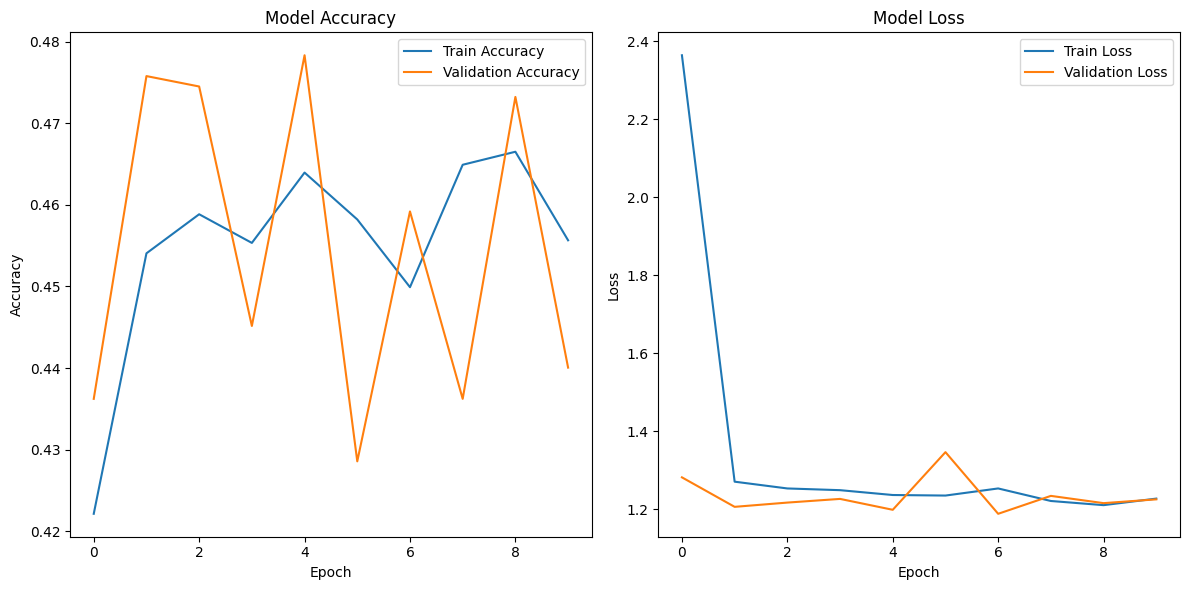

31/31 [==============================] - 0s 1ms/step


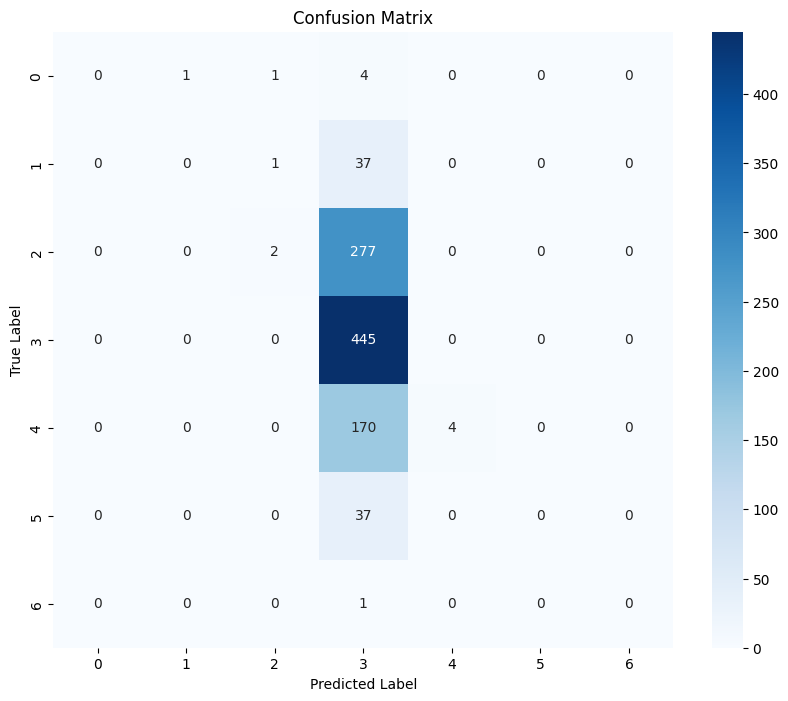

In [ ]:
# Plotting the learning curve
def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the learning curve
plot_learning_curve(history)

# Predicting the test set results
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Computing the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Initial Model: White Wine Results:#
- Before implementing data scaling and engineering, an initial model was created to establish a baseline for comparison. This model used the raw data without any preprocessing such as scaling or oversampling. This approach helps to understand the impact of raw features on model performance.
#### Model Architecture:####
    - This model is a Sequential model using the Keras API, a popular choice for building neural networks due to its simplicity and the ability to add layers in a step-by-step fashion. A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

#### Number of Layers and Their Functions ####
- Input Layer: Implicitly defined by input_shape in the first Dense layer. The input shape should match the number of features in your dataset. This is not a layer itself but a specification for the input data's structure.
- Dense Layers:
    - First Dense Layer: 128 neurons and ReLU (Rectified Linear Unit) activation function. ReLU is chosen for its efficiency and effectiveness in non-linear transformations, helping to add non-linearity to the model, which is crucial for learning complex patterns in the data.
    - Second Dense Layer: 64 neurons, also with ReLU activation. This layer continues to build on the abstract representations learned by the previous layer.
    - Third Dense Layer: 32 neurons, with ReLU activation. This smaller layer further refines the features passed down from the previous layers, preparing for the final classification output.
- Output Layer: Number of neurons equal to the number of classes in the target variable, uses softmax activation. Softmax is used because it's ideal for multi-class classification where each output can be interpreted as a probability of belonging to one of the classes, with all probabilities summing up to 1.

#Model Improvement: Data Engineering Tasks #
- The quality scores in the dataset range from 3 to 9, with a significant imbalance: most wines have a quality score of 5, 6, or 7, while scores of 3, 4, 8, and 9 are less frequent, especially 9 which appears only 5 times. This imbalance likely causes the model to struggle in predicting categories with fewer samples.

* Addressing Class Imbalance:
    - Rebinning: Could merge adjacent classes to reduce the number of categories, which can help mitigate the class imbalance issue.
    - Oversampling Minorities: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for underrepresented classes.
* Feature Engineering:
    - Polynomial Features: Generate polynomial and interaction features which can help in capturing non-linear relationships.
    - Scaling: Standardize or normalize the features, especially if you plan to use models that are sensitive to the scale of input data like neural networks.
* Advanced Techniques:
    - Dimensionality Reduction: Techniques like PCA (Principal Component Analysis) might help in improving model performance by reducing noise and overfitting.

###Improved Model: White Wine ###

In [ ]:
# Machine Learning preprocessing and model evaluation
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Deep Learning framework
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler

smote = RandomOverSampler()
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

# Generating polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_res_scaled)

# Dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_poly)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.2, random_state=42)

# Define the classification model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Softmax for multi-class classification

# Compile the model with categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/15
308/308 [==============================] - 2s 4ms/step - loss: 1.2174 - accuracy: 0.5274 - val_loss: 0.8987 - val_accuracy: 0.6450
Epoch 2/15
308/308 [==============================] - 1s 3ms/step - loss: 0.8224 - accuracy: 0.6629 - val_loss: 0.7727 - val_accuracy: 0.6877
Epoch 3/15
308/308 [==============================] - 1s 3ms/step - loss: 0.7007 - accuracy: 0.7103 - val_loss: 0.6862 - val_accuracy: 0.7161
Epoch 4/15
308/308 [==============================] - 1s 3ms/step - loss: 0.6278 - accuracy: 0.7454 - val_loss: 0.6364 - val_accuracy: 0.7388
Epoch 5/15
308/308 [==============================] - 1s 3ms/step - loss: 0.5630 - accuracy: 0.7724 - val_loss: 0.5877 - val_accuracy: 0.7559
Epoch 6/15
308/308 [==============================] - 1s 3ms/step - loss: 0.5196 - accuracy: 0.7889 - val_loss: 0.5495 - val_accuracy: 0.7758
Epoch 7/15
308/308 [==============================] - 1s 3ms/step - loss: 0.4741 - accuracy: 0.8085 - val_loss: 0.5285 - val_accuracy: 0.7774
Epoch 

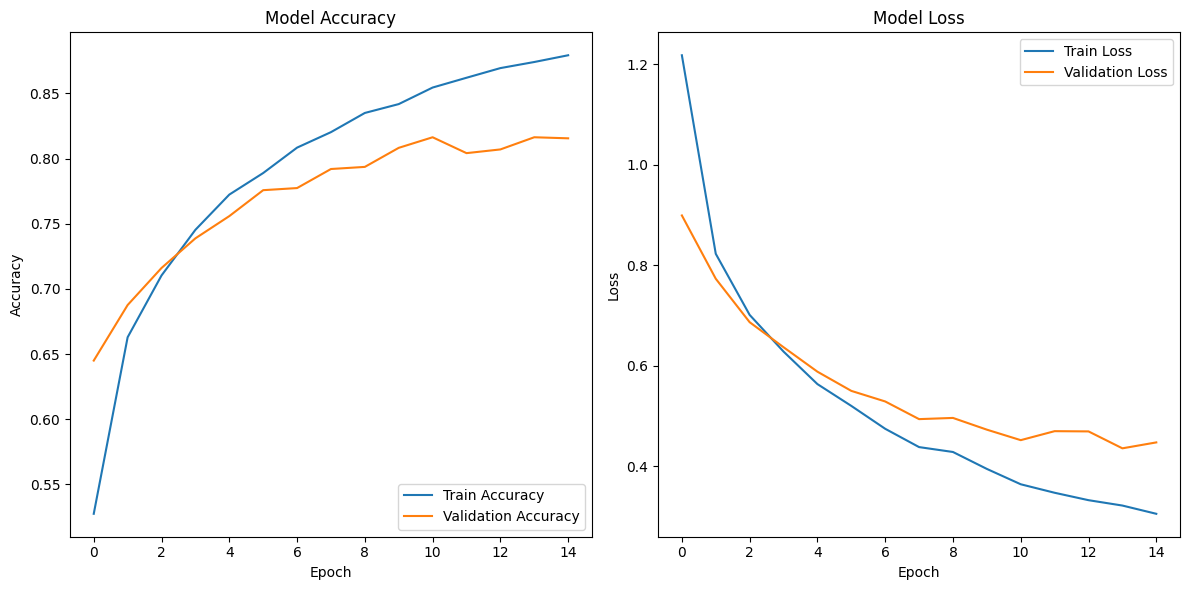

97/97 [==============================] - 0s 1ms/step


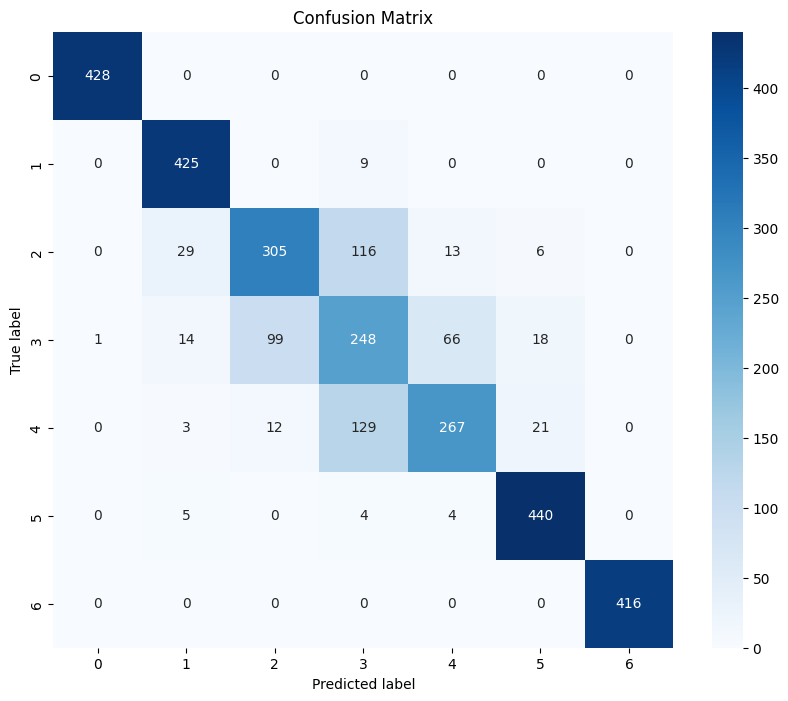

In [ ]:
# Function to plot the learning curve
def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Generate plots
plot_learning_curve(history)

# Predict classes to plot confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Assuming 'classes' variable has the list of class names in the order they appear in 'y'
classes = np.unique(y_true_classes)  # You might need to adjust this if labels are not sequential
plot_confusion_matrix(y_true_classes, y_pred_classes, classes)


### Observations ###
- After data engineering this model performs much better than the previous, with final accuracy score of 0.82 and final loss of 0.44.  
  - The loss score is lower than in the previous model but not by much.
- After datascaling the labels range have changed. keep in mind that 0-6 actually represents quality scores 3-9
- we can see that the model was almost perfect at predicting wines with high scores and low scores.  This is due to the fact that we had so few datapoints at those extremes and used oversampling to multiple them.  Therefore the model memorized those few replicated points and perfectly predicts them, making our accuracy score inflated.
  - In the real world we would want to collect more low score and high score wines data in order to make our model more robust.
- By the 15th epoch we are starting to see some overfit as training accuracy continues to improve and validation accuracy flattens off.  

### Red Wine Data ###


In [ ]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.utils import to_categorical

# Load dataset from CSV file
file_path = '/content/drive/MyDrive/Johns Hopkins BARM/deep learnign with unstructured data/winequality-red.csv'
wine_quality = pd.read_csv(file_path, delimiter=';')

# Extract features and target
X = wine_quality.drop('quality', axis=1).values
y = wine_quality['quality'].values

# Convert targets to categorical labels
y = to_categorical(y)

In [ ]:
# Machine Learning preprocessing and model evaluation
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Deep Learning framework
from keras.models import Sequential
from imblearn.over_sampling import RandomOverSampler

smote = RandomOverSampler()
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
smote = RandomOverSampler()
X_res, y_res = smote.fit_resample(X, y)

# Feature scaling
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

# Generating polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_res_scaled)

# Dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_poly)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.2, random_state=42)

# Define the classification model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Softmax for multi-class classification

# Compile the model with categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/15
82/82 [==============================] - 2s 6ms/step - loss: 1.4298 - accuracy: 0.4411 - val_loss: 1.0975 - val_accuracy: 0.5872
Epoch 2/15
82/82 [==============================] - 0s 4ms/step - loss: 0.9660 - accuracy: 0.6385 - val_loss: 0.8583 - val_accuracy: 0.6697
Epoch 3/15
82/82 [==============================] - 0s 4ms/step - loss: 0.8106 - accuracy: 0.7028 - val_loss: 0.7724 - val_accuracy: 0.7171
Epoch 4/15
82/82 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.7238 - val_loss: 0.6890 - val_accuracy: 0.7401
Epoch 5/15
82/82 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.7647 - val_loss: 0.6335 - val_accuracy: 0.7370
Epoch 6/15
82/82 [==============================] - 0s 4ms/step - loss: 0.5739 - accuracy: 0.7728 - val_loss: 0.5886 - val_accuracy: 0.7615
Epoch 7/15
82/82 [==============================] - 0s 4ms/step - loss: 0.5276 - accuracy: 0.7965 - val_loss: 0.5510 - val_accuracy: 0.7737
Epoch 8/15
82/82 [==

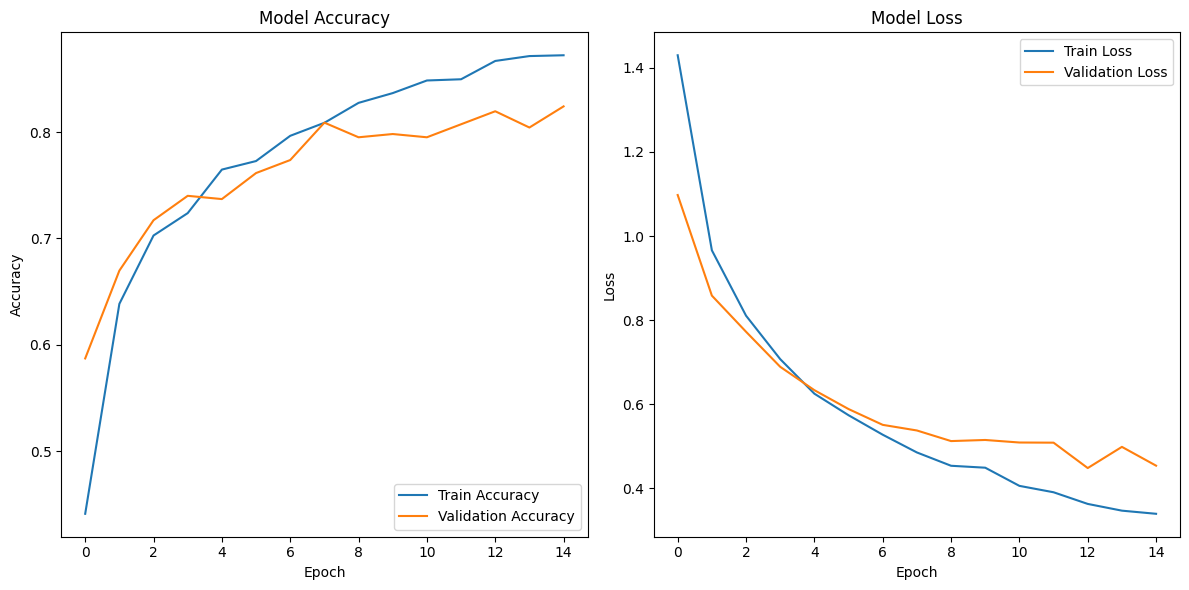

26/26 [==============================] - 0s 1ms/step


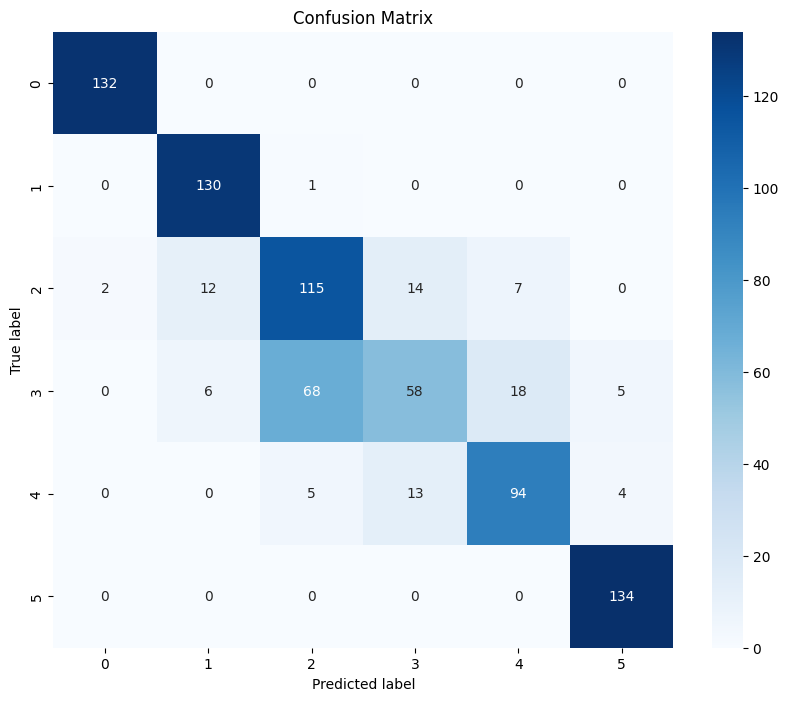

In [ ]:
# Function to plot the learning curve
def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Generate plots
plot_learning_curve(history)

# Predict classes to plot confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Assuming 'classes' variable has the list of class names in the order they appear in 'y'
classes = np.unique(y_true_classes)  # You might need to adjust this if labels are not sequential
plot_confusion_matrix(y_true_classes, y_pred_classes, classes)

### Observations ###
####Data Scaling Impact:####
- Post-scaling, the label ranges have been altered (e.g., 0-6 now represents quality scores of 3-9). This alteration needs to be clearly documented and understood in the context of model output interpretation.
Performance Extremes:

- The model demonstrates near-perfect predictions at the extremes of the wine quality spectrum. However, this could be attributed to the overrepresentation of these categories through SMOTE, rather than an accurate learning of their characteristics.
Signs of Overfitting:

- Overfitting becomes apparent by the 15th epoch, where the training accuracy continues to rise while validation accuracy plateaus. This is particularly evident in the white wine model, likely exacerbated by the larger dataset size compared to the red wine dataset.

# Analytical and Model Conclusions #
* Data Variety and Quality:
  - Expanding the dataset to include more examples of wines with extreme scores (both high and low) is crucial. This will likely enhance the model's performance by providing a more balanced perspective on varying quality levels.
* Influence of Synthetic Data:
  - The use of SMOTE (Synthetic Minority Over-sampling Technique) to augment the dataset may have artificially inflated the accuracy of the model. This suggests the current high accuracy could primarily be reflecting the synthetic data's patterns rather than learning from genuine, diverse examples.
* Complexity and Depth of Model:
  - Introducing additional layers and perhaps exploring more complex architectures might allow the model to capture more nuanced relationships within the data, potentially leading to improvements in model performance given sufficient training data.
* Beyond Chemical Composition:
  - The prediction of wine quality extends beyond just chemical attributes. Factors like region, producer, and grape variety play significant roles and their inclusion could potentially refine the model’s predictions.
* Dimensionality and Feature Engineering:
  - Implementing techniques like PCA (Principal Component Analysis) for dimensionality reduction or creating polynomial features could help in managing feature space complexity and improving model accuracy by reducing overfitting and noise.

# Recommendations #

- Aim to acquire a more diverse dataset encompassing a wide range of wine ratings, along with additional data points such as region, producer, and grape varieties. This broader data collection strategy can help in mitigating biases and improving the robustness of the model.
Advanced Data Techniques:

- Explore advanced data sampling techniques and consider rebinning or merging classes to address class imbalance. Employ scaling and normalization methods especially when dealing with features that significantly vary in magnitudes or units.